In [179]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Using df1 and df2 because one file didn't had enough data. So, by merging we acquired data from jan,2000 till july,2023

In [180]:
df1 = pd.read_csv(r"C:\Users\shubham.rangate\Desktop\ExcelR\Projects\Oil\Crude Oil WTI Futures Historical Prices - Investing.com India(csv(2)).csv")
df2 = pd.read_csv(r"C:\Users\shubham.rangate\Desktop\ExcelR\Projects\Oil\Crude Oil WTI Futures Historical Prices - Investing.com India(csv).csv")
merged_df = pd.concat((df1,df2), ignore_index=True)

In [181]:
merged_df

Date  Price   Open   High    Low   Volume    Chg_
0     Jan 21, 2005  48.53  47.30  48.95  47.27  109.39K   3.45%
1     Jan 20, 2005  46.91  47.60  47.60  46.40   34.82K  -1.35%
2     Jan 19, 2005  47.55  48.36  48.41  47.50   66.70K  -1.72%
3     Jan 18, 2005  48.38  48.60  49.50  47.70   76.81K   0.00%
4     Jan 14, 2005  48.38  47.87  48.65  47.60   73.82K   0.71%
...            ...    ...    ...    ...    ...      ...     ...
6033  Jan 31, 2005  48.20  46.68  48.25  46.01  107.50K   2.16%
6034  Jan 28, 2005  47.18  48.84  48.85  46.80  106.86K  -3.40%
6035  Jan 27, 2005  48.84  49.03  49.65  48.60   85.86K   0.12%
6036  Jan 26, 2005  48.78  49.51  49.74  47.90  115.70K  -1.73%
6037  Jan 25, 2005  49.64  48.82  49.75  48.35   77.80K   1.70%

[6038 rows x 7 columns]

#### Fetching only necessary columns

In [182]:
df = merged_df.iloc[:,:2]
df

Date  Price
0     Jan 21, 2005  48.53
1     Jan 20, 2005  46.91
2     Jan 19, 2005  47.55
3     Jan 18, 2005  48.38
4     Jan 14, 2005  48.38
...            ...    ...
6033  Jan 31, 2005  48.20
6034  Jan 28, 2005  47.18
6035  Jan 27, 2005  48.84
6036  Jan 26, 2005  48.78
6037  Jan 25, 2005  49.64

[6038 rows x 2 columns]

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6038 entries, 0 to 6037
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6038 non-null   object 
 1   Price   6038 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.5+ KB


In [184]:
df.duplicated(keep= False)

0       False
1       False
2       False
3       False
4       False
        ...  
6033    False
6034    False
6035    False
6036    False
6037    False
Length: 6038, dtype: bool

In [185]:
df.shape

(6038, 2)

In [186]:
df.describe()

Price
count  6038.000000
mean     62.963321
std      25.762228
min     -37.630000
25%      42.762500
50%      60.590000
75%      82.377500
max     145.290000

#### Making python recognise the date column and then setting it as index column

In [187]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.set_index('Date')
df

Price
Date             
2005-01-21  48.53
2005-01-20  46.91
2005-01-19  47.55
2005-01-18  48.38
2005-01-14  48.38
...           ...
2005-01-31  48.20
2005-01-28  47.18
2005-01-27  48.84
2005-01-26  48.78
2005-01-25  49.64

[6038 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

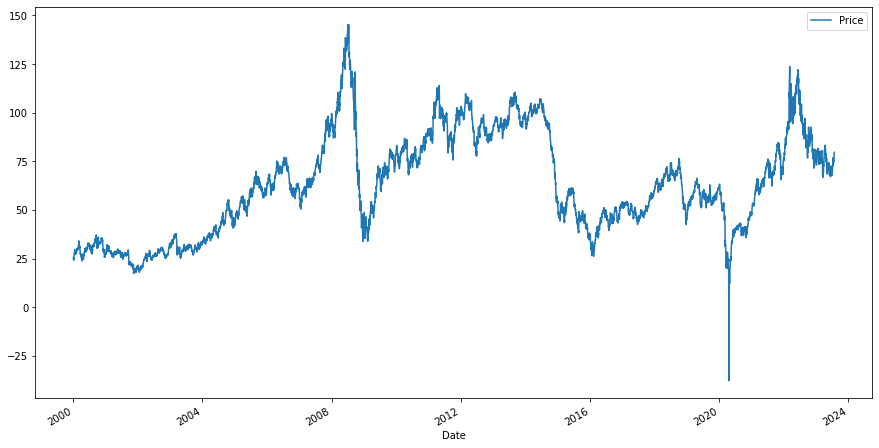

In [188]:
df.plot(figsize=(15,8))

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

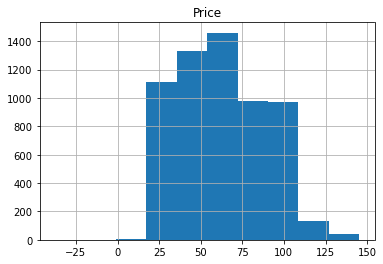

In [189]:
df.hist()

<AxesSubplot:>

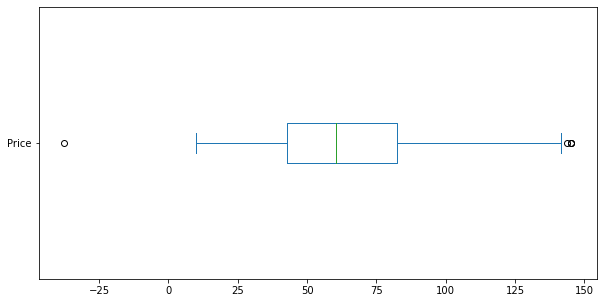

In [190]:
df.plot(kind='box', vert=False, figsize=(10,5))

It shows that the data is mostly in between 45 to 80 and also that the data has outliers

<AxesSubplot:ylabel='Density'>

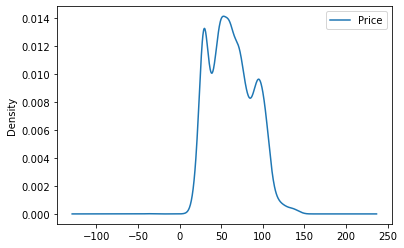

In [191]:
df.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

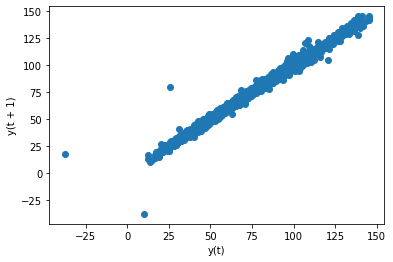

In [192]:
from pandas .plotting import lag_plot
lag_plot(df)

Lag plot graphical tool used in time series analysis to visualize the autocorrelation or dependence between a time series and its lagged values. Here it shows the upward linear trend.

#### Dealing with Outliers:

1.by using Z-score method

In [193]:
df['Price'].skew()

0.3004973490245697

In [194]:
mean=df.Price.mean()
mean

62.96332063597229

In [195]:
std=df.Price.std()
std

25.762227758533136

In [196]:
#We are going to use '3' as threshold

mean - 3 * std


-14.323362639627128

In [197]:
mean + 3 * std

140.2500039115717

In [198]:
#getting the values of outliers
df[(df.Price < (mean - 3 * std)) | (df.Price > (mean + 3 * std))]

Price
Date              
2020-04-20  -37.63
2008-07-14  145.18
2008-07-11  145.08
2008-07-10  141.65
2008-07-07  141.37
2008-07-03  145.29
2008-07-02  143.57
2008-07-01  140.97

In [199]:
#Removing the outliers
df_z = df[(df.Price > (mean - 3 * std)) & (df.Price < (mean + 3 * std))]
df_z.shape

(6030, 1)

<AxesSubplot:>

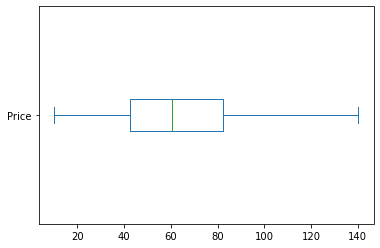

In [200]:
#checking the outliers again:
df_z.plot(kind= 'box', vert=False)

<AxesSubplot:ylabel='Density'>

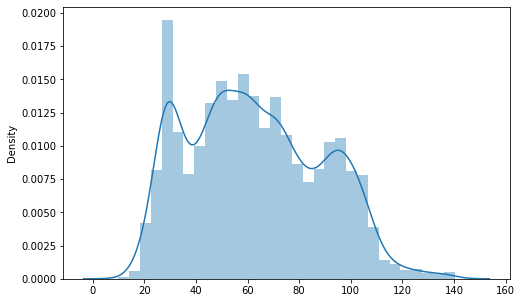

In [201]:
plt.figure(figsize=(8, 5))

sns.distplot(df_z)

We can see the data is less skewed now

2. by using capping method:

In [202]:
# Function to cap outliers based on percentiles:
def cap_outliers(series, lower_percentile, upper_percentile):
    lower_cap = series.quantile(lower_percentile)
    upper_cap = series.quantile(upper_percentile)
    series_capped = np.clip(series, lower_cap, upper_cap)
    return series_capped

# Group data by month and cap outliers in each month
df['Month'] = df.index.month
df['Year'] = df.index.year

df['Price'] = df['Price'].transform(lambda x: cap_outliers(x, 0.05, 0.95))
df['Price']= df.groupby('Month')['Price'].transform(lambda x: cap_outliers(x, 0.05, 0.95))
df['Price'] = df.groupby('Year')['Price'].transform(lambda x: cap_outliers(x, 0.05, 0.95))

# The 'Temperature_Capped' column now contains the values with outliers capped
print(df.head())
 
"""The np.clip function ensures that all values in the 'Price' column are between the 'min_threshold' and 
'max_threshold'.Any value below 'min_threshold' will be replaced by 'min_threshold'
and any value above 'max_threshold' will be replaced by 'max_threshold'"""

            Price  Month  Year
Date                          
2005-01-21  48.53      1  2005
2005-01-20  46.91      1  2005
2005-01-19  47.55      1  2005
2005-01-18  48.38      1  2005
2005-01-14  48.38      1  2005


"The np.clip function ensures that all values in the 'Price' column are between the 'min_threshold' and \n'max_threshold'.Any value below 'min_threshold' will be replaced by 'min_threshold'\nand any value above 'max_threshold' will be replaced by 'max_threshold'"

In [203]:
df_cap = df.drop(['Month','Year'], axis=1)

<AxesSubplot:>

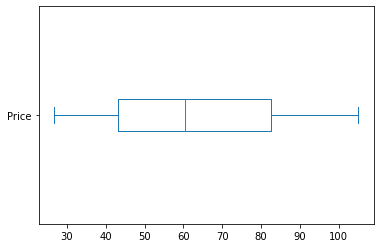

In [204]:
df_cap.plot(kind= 'box', vert=False)

<AxesSubplot:ylabel='Density'>

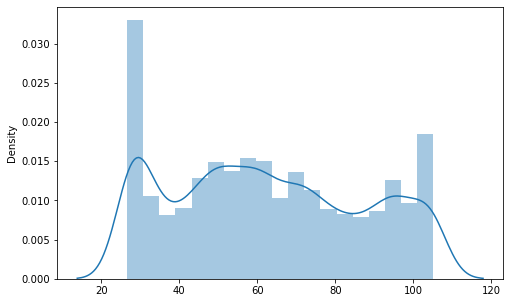

In [205]:
plt.figure(figsize=(8, 5))

sns.distplot(df_cap)

this graph shows the density and skewness, from this we can see the little positive skewness

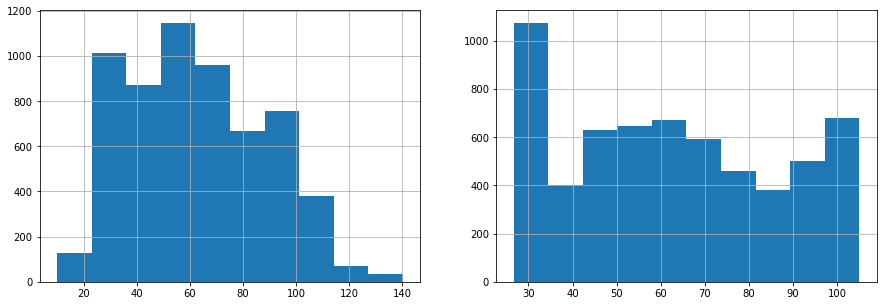

In [206]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(df_z)
axs[0].grid(True)
axs[1].hist(df_cap)
axs[1].grid(True)

In [338]:
data = df_cap

In [427]:
#As we may have noticed the time series data does not contain the values for Saturday and Sunday as the market is closed on weekends. Hence missing values have to be filled. To fill in weekends, first make date as index (for resample method), then use forward fill ffill(), which will assign the weekend values with Friday value
oilprices = data.resample('D').interpolate(method='linear')
oilprices1 = oilprices.copy()
oilprices.head()

Price
Date             
2000-01-04  26.62
2000-01-05  26.62
2000-01-06  26.62
2000-01-07  26.62
2000-01-08  26.62

In [430]:
#Get month and year columns in our data

oilprices1['year'] = oilprices1.index.year
oilprices1['month'] = oilprices1.index.month
oilprices1.head(5)

Price  year  month
Date                          
2000-01-04  26.62  2000      1
2000-01-05  26.62  2000      1
2000-01-06  26.62  2000      1
2000-01-07  26.62  2000      1
2000-01-08  26.62  2000      1

<AxesSubplot:xlabel='Date'>

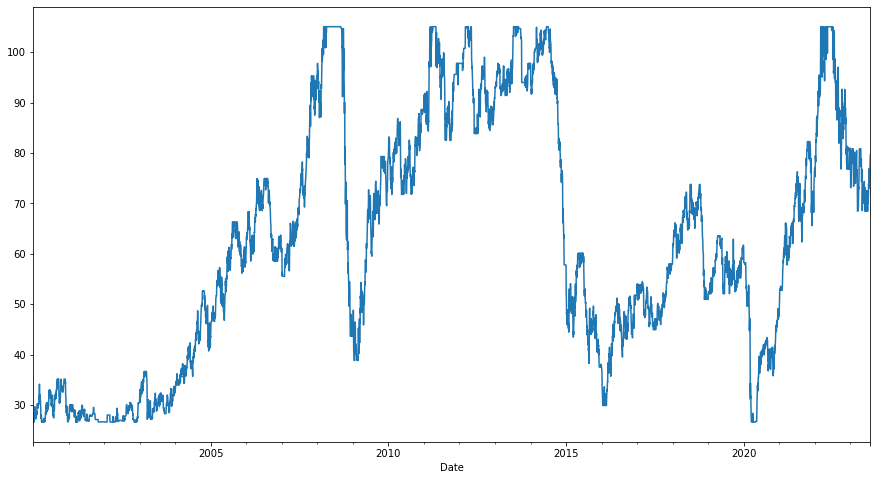

In [431]:
oilprices1['Price'].plot(figsize=(15,8))

### Yearly Price Visualization

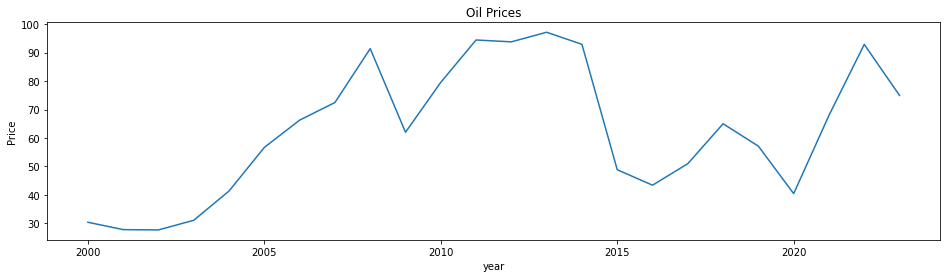

In [432]:
yearlyPrice=oilprices1.groupby(["year"])['Price'].mean()
plt.figure(figsize=(16,4))
plt.title('Oil Prices')
plt.xlabel('Year')
plt.ylabel('Price')
yearlyPrice.plot()
plt.show();

### Monthly Price Visualization

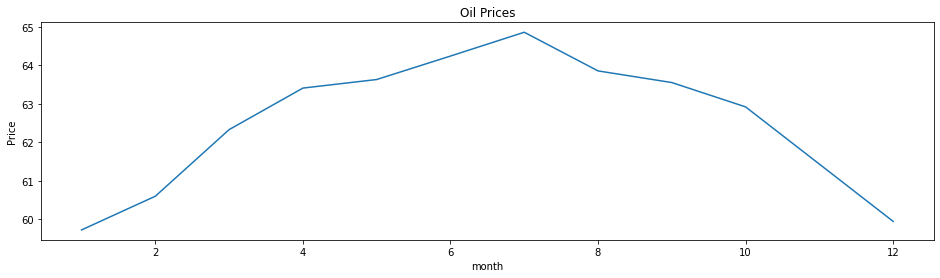

In [433]:
monthlyPrice=oilprices1.groupby(["month"])['Price'].mean()
plt.figure(figsize=(16,4))
plt.title('Oil Prices')
plt.xlabel('month')
plt.ylabel('Price')
monthlyPrice.plot()
plt.show();

<AxesSubplot:xlabel='month', ylabel='Price'>

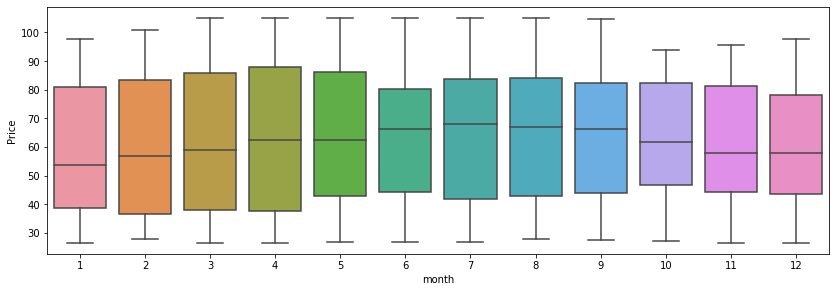

In [435]:
#checking the bocplots for each month:

plt.figure(figsize=(14,10))
plt.subplot(211)
sns.boxplot(x="month",y="Price",data=oilprices1)


* monthly prices are nearly same in every year and not varying 
* Prices are increased in 2008 due to financial crisis  and decreased due to covid in 2019 and 2020 year

<AxesSubplot:xlabel='year', ylabel='Price'>

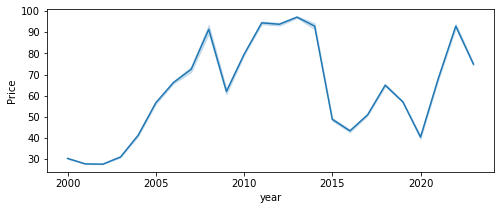

In [214]:
plt.figure(figsize=(8,3))
sns.lineplot(x="year",y="Price",data=oilprices1)

## Moving Average

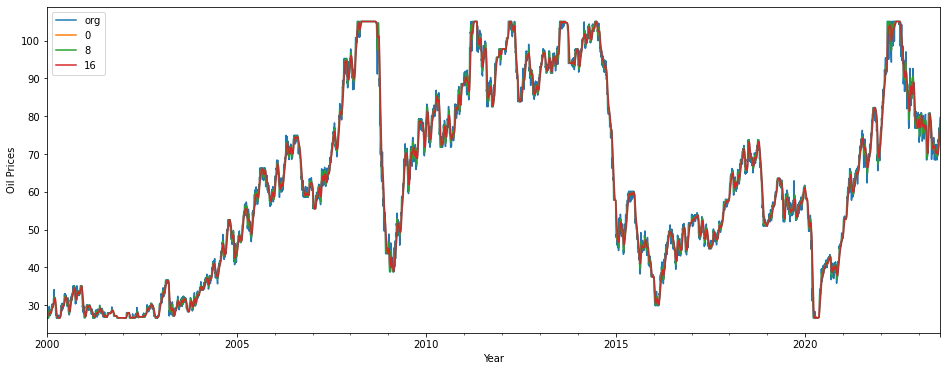

In [215]:
# moving average (smoothening of graph)
import datetime as dt

plt.figure(figsize=(16,6))
oilprices1.Price.plot(label="org")
for i in range(0,20,8):
    oilprices1["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("Oil Prices")
plt.legend(loc="upper left")
plt.xlim((dt.datetime(2000, 1, 1), max(data.index)))
plt.show()

we can see that the fluctuations that were so drastic in the daily data are now smoothing out

### Time series decomposition plot

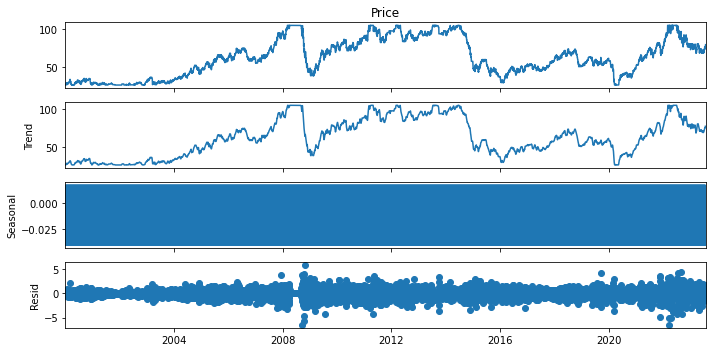

In [413]:
import statsmodels.api as sm

decompose_ts_add = sm.tsa.seasonal_decompose(oilprices1.Price)
decompose_ts_add.plot()
plt.show()

* 1st graph is the original plot.
* Second grah shows the trend of data.
* Third graph shows seasonality in the data.
* 4th graph shows the noise in data.

## Forecasting Model Based Methods

In [217]:
month_dummy = pd.DataFrame(pd.get_dummies(oilprices1['month']))
oilprices1 = pd.concat([oilprices1,month_dummy],axis=1)

In [218]:
oilprices1.rename(columns={1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:'jun',7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},inplace=True)
oilprices1.head()

Price  year  month  jan  feb  mar  apr  may  jun  jul  aug  sep  \
Date                                                                          
2000-01-04  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-05  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-06  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-07  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-08  26.62  2000      1    1    0    0    0    0    0    0    0    0   

            oct  nov  dec  
Date                       
2000-01-04    0    0    0  
2000-01-05    0    0    0  
2000-01-06    0    0    0  
2000-01-07    0    0    0  
2000-01-08    0    0    0

### Spliting Data Into Train and Test For Model Based Approch

In [219]:
oilprices1['t']=range(1,8605)
oilprices1['t_squared']=oilprices1['t']*oilprices1['t']
oilprices1['log_price']=np.log(oilprices1['Price'])
oilprices1.head()

Price  year  month  jan  feb  mar  apr  may  jun  jul  aug  sep  \
Date                                                                          
2000-01-04  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-05  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-06  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-07  26.62  2000      1    1    0    0    0    0    0    0    0    0   
2000-01-08  26.62  2000      1    1    0    0    0    0    0    0    0    0   

            oct  nov  dec  t  t_squared  log_price  
Date                                                
2000-01-04    0    0    0  1          1   3.281663  
2000-01-05    0    0    0  2          4   3.281663  
2000-01-06    0    0    0  3          9   3.281663  
2000-01-07    0    0    0  4         16   3.281663  
2000-01-08    0    0    0  5         25   3.281663

In [220]:
Train_size= int(len(oilprices1)*0.80)
Train = oilprices1[:Train_size]
Test =oilprices1[Train_size:]
Train.shape,Test.shape

((6883, 18), (1721, 18))

In [221]:
# Linear Model 
import statsmodels.formula.api as smf 
linear_model = smf.ols('Price~t',data=Train).fit() 
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear))**2))
print(rmse_linear)

# Exponential 
Exp = smf.ols('log_price~t',data=Train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_exp)))**2))
print(rmse_Exp)

# Quadratic
quad_model = smf.ols('Price~t+t_squared',data=Train).fit()
pred_quad = pd.Series(quad_model.predict(Test[['t','t_squared']]))
rmse_quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_quad))**2))
print(rmse_quad)

# Additive Seasonality 
add_sea = smf.ols('Price~jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_add_sea))**2))
print(rmse_add_sea)

# add Sea with Quadratic Trend 
add_sea_quad = smf.ols('Price~t+t_squared+jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_add_sea_quad))**2))
print(rmse_add_sea_quad)

# Multiplicative Season 
mul_sea= smf.ols('log_price~jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov',data=Train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(Test))
rmse_mul_sea = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_mul_sea)))**2))
print(rmse_mul_sea)

#Multiplicative Additive Seasonality
mul_add_sea = smf.ols('log_price~t+jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov',data=Train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(Test))
rmse_mul_add_sea= np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_mul_add_sea)))**2))
print(rmse_mul_add_sea)

28.901977882984628
34.572132732235815
53.21587350259212
19.816604225391426
53.48696329490583
21.5724073056021
34.432730300016075


In [222]:
# Comapre the Results 
data = {'Model':pd.Series(['rmse_linear','rmse_Exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add_sea']),'Rmse_Values':pd.Series([rmse_linear,rmse_Exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['Rmse_Values'])

Model  Rmse_Values
3       rmse_add_sea    19.816604
5       rmse_mul_sea    21.572407
0        rmse_linear    28.901978
6   rmse_mul_add_sea    34.432730
1           rmse_Exp    34.572133
2          rmse_quad    53.215874
4  rmse_add_sea_quad    53.486963

By Using Model Driven Models We Achieved Lower RMSE For Additive Seasonality

## Data Driven Models

In [223]:
oilprices.head(5)

Price
Date             
2000-01-04  26.62
2000-01-05  26.62
2000-01-06  26.62
2000-01-07  26.62
2000-01-08  26.62

In [227]:
#splitting the data:
Train_size_1= int(len(oilprices)*0.80)
Train_1 = oilprices[:Train_size_1]
Test_1 =oilprices[Train_size_1:]
Train_1.shape,Test_1.shape

((6883, 1), (1721, 1))

### Evaluation Metric MAPE

In [228]:
from sklearn.metrics import mean_squared_error

In [229]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Hyperparameter Tuning: Smoothing level

In [230]:
import warnings
warnings.filterwarnings("ignore")

for i in np.arange(0.1, 1.1, 1/10):
    ses_model = SimpleExpSmoothing(Train_1["Price"].dropna()).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test_1.index[0],end = Test_1.index[-1])
    score = MAPE(pred_ses,Test_1.Price)
    print("smoothing_level = {}".format(i),"--->","Mape_Score",score)

smoothing_level = 0.1 ---> Mape_Score 28.452923794951747
smoothing_level = 0.2 ---> Mape_Score 27.496164014147162
smoothing_level = 0.30000000000000004 ---> Mape_Score 27.17912382348415
smoothing_level = 0.4 ---> Mape_Score 27.026822232964296
smoothing_level = 0.5 ---> Mape_Score 26.936911460900173
smoothing_level = 0.6 ---> Mape_Score 26.875288478236083
smoothing_level = 0.7000000000000001 ---> Mape_Score 26.828638072803592
smoothing_level = 0.8 ---> Mape_Score 26.790972277679803
smoothing_level = 0.9 ---> Mape_Score 26.76063865353826
smoothing_level = 1.0 ---> Mape_Score 26.737397493144126


* We could see that, 1.0 give less MAPE value so we can use 1.0

### Simple Exponential Smoothing

In [231]:
ses_model = SimpleExpSmoothing(Train_1["Price"]).fit(smoothing_level=1.0)
pred_ses = ses_model.predict(start = Test_1.index[0],end = Test_1.index[-1])
rmse_ses = np.sqrt(mean_squared_error(Test_1.Price,pred_ses))
rmse_ses

19.812001747870358

### Holt Method

In [232]:
hw_model = Holt(Train_1["Price"]).fit(smoothing_level=1.0, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test_1.index[0],end = Test_1.index[-1])
rmse_hw = np.sqrt(mean_squared_error(Test_1.Price,pred_hw))
rmse_hw

472.24905147975045

### Holts winter exponential smoothing with additive seasonality and additive trend

In [233]:
hwe_model_add_add = ExponentialSmoothing(Train_1["Price"] ,seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test_1.index[0],end = Test_1.index[-1])
rmse_hwe_add_add = np.sqrt(mean_squared_error(Test_1.Price,pred_hwe_add_add))
rmse_hwe_add_add

17.854517926597076

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [234]:
hwe_model_mul_add = ExponentialSmoothing(Train_1["Price"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test_1.index[0],end = Test_1.index[-1])
rmse_hwe_mul_add = np.sqrt(mean_squared_error(Test_1.Price,pred_hwe_mul_add))
rmse_hwe_mul_add

17.86019209964748

* we could see that, Holts winter exponential smoothing with additive seasonality and additive trend gives better accurcy results.

## ARIMA Model

In [235]:
oilprices.head()

Price
Date             
2000-01-04  26.62
2000-01-05  26.62
2000-01-06  26.62
2000-01-07  26.62
2000-01-08  26.62

In [236]:
from statsmodels.tsa.stattools import adfuller

### Statistical Tests:
Perform statistical tests such as the Augmented Dickey-Fuller (ADF) test to check for stationarity (which indirectly indicates the presence of trends) and the presence of seasonality

weak evidence against null hypothesis, time series has a unit root so the data is non-stationary
Now to convert non-stationary into stationary we will use differencing

Differencing: In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:
yt‘ = yt – y(t-1)

where yt is the value at a time t

Applying differencing on our series and plotting the results



In [237]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [238]:
result = adf_test(oilprices.Price)

Fail to reject the null hypothesis
Data is non-stationary


In [239]:
from statsmodels.tsa.statespace.tools import diff

oilprices['d1'] = diff(oilprices['Price'],k_diff=1)
adf_test(oilprices['d1'])

Reject the null hypothesis
Data is stationary


* We can perform ARIMA on Price first Difference data as this is stationary

### ACF and PACF Plots

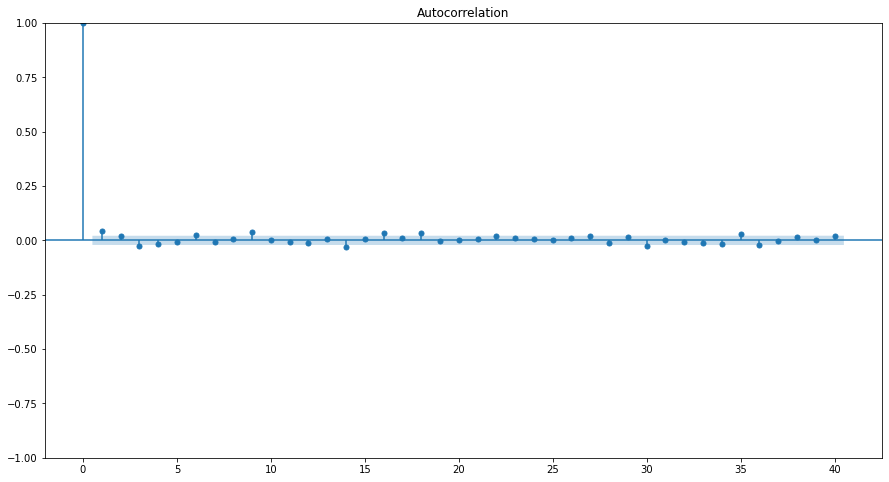

In [240]:
import statsmodels.graphics.tsaplots as tsa_plots

#ACF plot:
with plt.rc_context():                                     
    plt.rc("figure", figsize=(15,8))
    tsa_plots.plot_acf(oilprices.d1.dropna())                 #q=1/2
    plt.show()

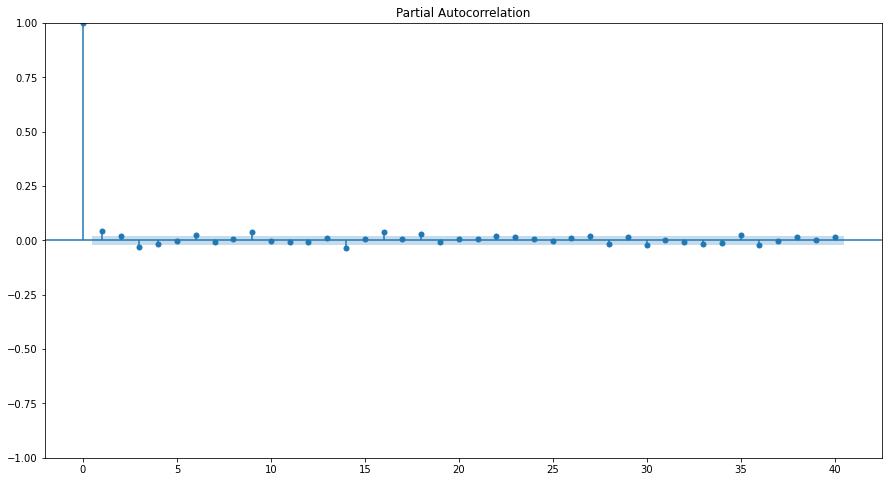

In [241]:
import statsmodels.graphics.tsaplots as tsa_plots

with plt.rc_context():
    plt.rc("figure", figsize=(15,8))
    tsa_plots.plot_pacf(oilprices.d1.dropna())              #p=1/2
    plt.show()

In [242]:
#splitting the data:
Train_size_2= int(len(oilprices)*0.80)
Train_2 = oilprices[:Train_size_2]
Test_2 =oilprices[Train_size_2:]

## ARIMA Hyperparameter Tuning

order(p,d,q)*

p = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series.

d = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary.

q = This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality

In [243]:
# grid search ARIMA parameters for a time series
from numpy import sqrt
from statsmodels.tsa.arima.model import ARIMA

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [244]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [68]:
# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 1)
q_values = range(0, 2)

warnings.filterwarnings("ignore")
evaluate_models(Train_2["d1"].dropna().values, p_values, d_values, q_values)

In [245]:
arima_model = ARIMA(Train_2['Price'],order=(2, 1, 2))
arima_model = arima_model.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 6883
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9015.201
Date:                Fri, 11 Aug 2023   AIC                          18040.402
Time:                        13:42:53   BIC                          18074.586
Sample:                    01-04-2000   HQIC                         18052.191
                         - 11-07-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2408      0.046     -5.222      0.000      -0.331      -0.150
ar.L2         -0.7988      0.047    -17.128      0.000      -0.890      -0.707
ma.L1          0.2500      0.043      5.821      0.000       0.166       0.334
ma.L2          0.8366      0.043     19.418      0.000       0.752       0.921
sigma2         0.8041      0.006    134.643      0.000       0.792       0.816
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             23700.91
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predict the Test data:

In [246]:
preds= arima_model.predict(start=Test_2['Price'].index[0], end=Test_2['Price'].index[-1], dynamic=False, typ='levels')

In [247]:
preds.head()

2018-11-08    61.641476
2018-11-09    61.635505
2018-11-10    61.659729
2018-11-11    61.658666
2018-11-12    61.639571
Freq: D, Name: predicted_mean, dtype: float64

#### Model evaluation:

In [248]:
from sklearn.metrics import mean_squared_error

arima_error = np.sqrt(mean_squared_error(Test_2['Price'], preds))
arima_error

19.815883528455103

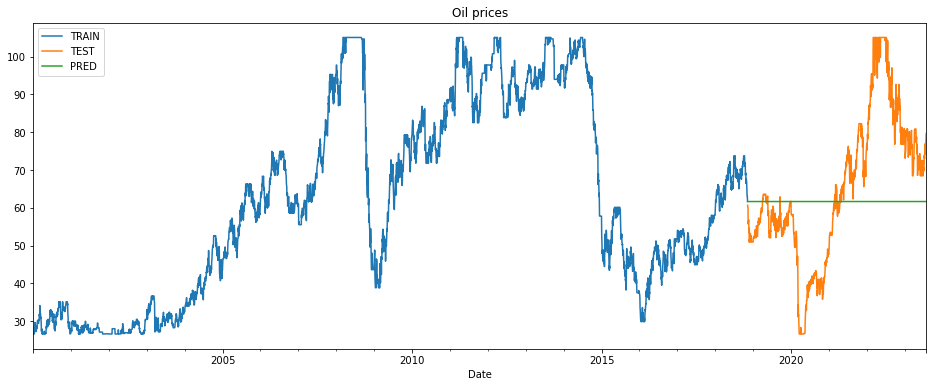

In [249]:
# Plot predictions against known values
title = 'Oil prices'
ylabel='Prices'
xlabel='' 

Train_2['Price'].plot(legend=True,label='TRAIN' ,figsize=(16,6),title=title)
Test_2['Price'].plot(legend=True,label='TEST',figsize=(16,6),title=title)
preds.plot(legend=True,label='PRED',)
plt.show()

### Fitting Auto-ARIMA

In [250]:
#building the model
from pmdarima.arima import auto_arima

auto_model = auto_arima(Train_2['Price'], trace=True, error_action='ignore', suppress_warnings=True)
auto_model.fit(Train_2['Price'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18042.191, Time=3.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18061.587, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18062.246, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18062.362, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18059.808, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18048.605, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18048.507, Time=0.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18052.068, Time=6.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18043.869, Time=6.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18055.298, Time=2.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18050.203, Time=2.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18050.309, Time=1.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18044.055, Time=9.65 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18040.402, Time=2.66 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [251]:
auto_preds= auto_model.predict(n_periods=len(Test_2))

In [252]:
auto_preds.tail()

2023-07-21    61.64972
2023-07-22    61.64972
2023-07-23    61.64972
2023-07-24    61.64972
2023-07-25    61.64972
Freq: D, dtype: float64

In [253]:
from sklearn.metrics import mean_squared_error

auto_arima_error = np.sqrt(mean_squared_error(Test_2['Price'], auto_preds))
auto_arima_error

19.815883528455103

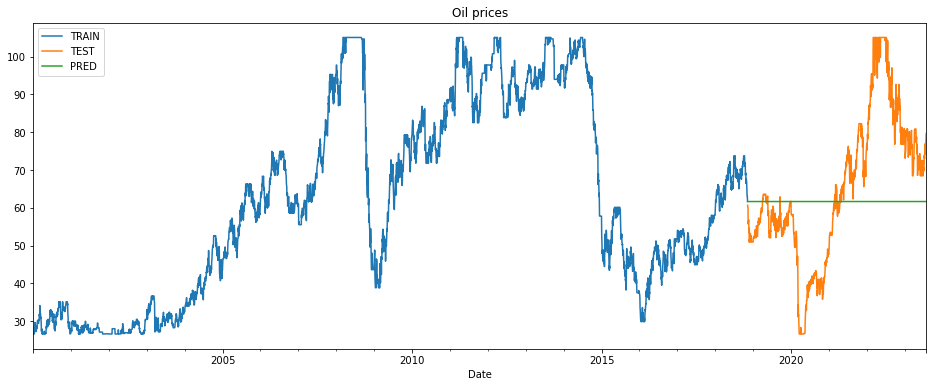

In [254]:
# Plot predictions against known values
title = 'Oil prices'
ylabel='Prices'
xlabel='' 

Train_2['Price'].plot(legend=True,label='TRAIN' ,figsize=(16,6),title=title)
Test_2['Price'].plot(legend=True,label='TEST',figsize=(16,6),title=title)
auto_preds.plot(legend=True,label='PRED',)
plt.show()

<!-- ## Retrain the model on the full data, and forecast the future -->

## SARIMA MODEL

In [255]:
oilprices2 = oilprices.copy()

In [256]:
oilprices2.drop("d1", axis=1, inplace=True)

In [257]:
oilprices2.head()

Price
Date             
2000-01-04  26.62
2000-01-05  26.62
2000-01-06  26.62
2000-01-07  26.62
2000-01-08  26.62

In [258]:
#splitting the data:
Train_size_3= int(len(oilprices2)*0.80)
Train_3 = oilprices2[:Train_size_3]
Test_3 =oilprices2[Train_size_2:]

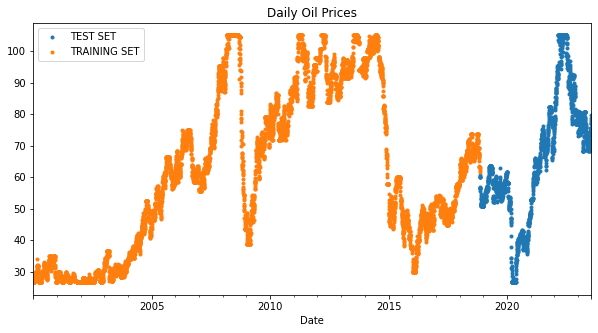

In [259]:
# Plot train and test so you can see where we have split
Test_3.rename(columns={'Price': 'TEST SET'}).join(Train_3.rename(columns={'Price': 'TRAINING SET'}),
                                                  how='outer').plot(figsize=(10,5), title='Daily Oil Prices', style='.')
plt.show()

### Differencing the daily data to remove seasonality

No handles with labels found to put in legend.


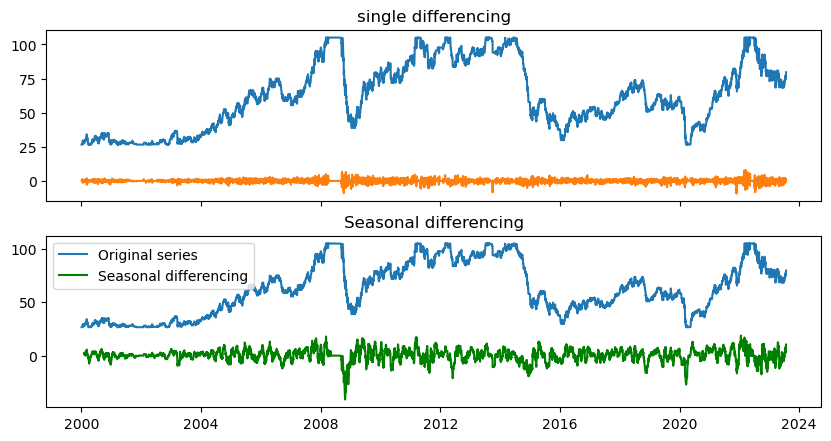

In [260]:
fig, axes = plt.subplots(2,1,figsize=(10,5),dpi=100,sharex=True)
data=oilprices2.Price
axes[0].plot(data[:], label = "Original series")
axes[0].plot(data[:].diff(1), label = "single differencing")
axes[0].set_title("single differencing")
plt.legend(loc='upper left', fontsize=10)

#Second differencing with 12 lags

axes[1].plot(data[:], label = "Original series")
axes[1].plot(data[:].diff(30), label = "Seasonal differencing",color='green')
axes[1].set_title("Seasonal differencing")
plt.legend(loc='upper left', fontsize=10)

plt.show()


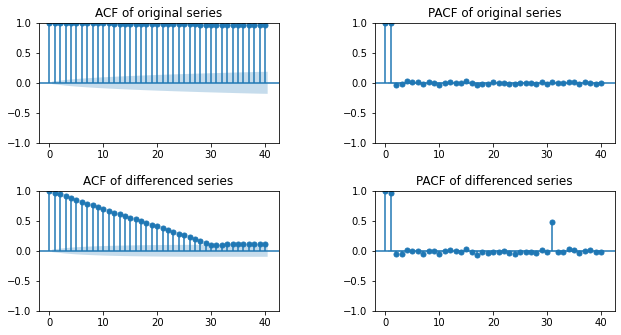

In [261]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
tsa_plots.plot_acf(oilprices2, ax=axes[0,0]); axes[0,0].set_title('ACF of original series')
tsa_plots.plot_pacf(oilprices2, ax=axes[0,1]); axes[0,1].set_title('PACF of original series')

#differencing
tsa_plots.plot_acf(oilprices2.diff(30).dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of differenced series')
tsa_plots.plot_pacf(oilprices2.diff(30).dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of differenced series')

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

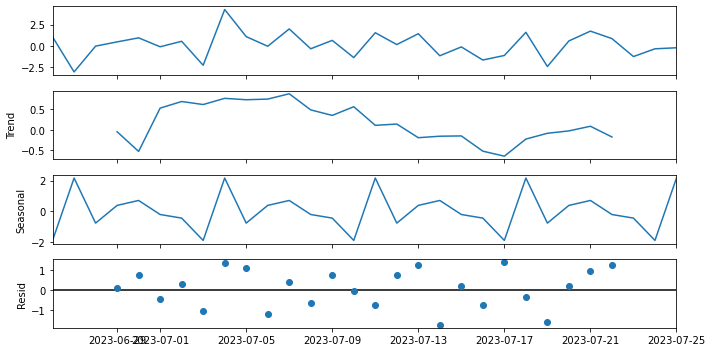

In [262]:
from statsmodels.tsa.seasonal import seasonal_decompose

diff12=oilprices2.diff(12).diff().dropna()
plt.rcParams['figure.figsize'] = [10, 5]
decomposition = seasonal_decompose(diff12[-30:], model='additive') # Aggregate to yearly level
decomposition.plot()
plt.show()

* There is some trend observed for last 30 days. Some correlation we can see in residuals also which should not be accepted.

In [263]:
import itertools

p = d = q =range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p,d,q))]

metric_aic_dict=dict()
for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(Train_3, order=pm, seasonal_order=pm_seasonal)
            model_aic=model.fit()
            metric_aic_dict.update({(pm, pm_seasonal):model_aic.aic})
        except:
            continue

In [84]:
max_value = min(metric_aic_dict, key=metric_aic_dict.get)
#printing thr maximium value
print("Best fit = ",max_value)

Best fit =  ((1, 1, 1), (0, 0, 1, 30))


### Fitting the model with best combinations:

In [264]:
sarima_model=sm.tsa.statespace.SARIMAX(Train_3,order=(1,1,1),seasonal_order=(0,0,1,30))
fitted_sarima = sarima_model.fit()
print(fitted_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9764      0.011     92.814      0.000       0.956       0.997
ma.L1         -0.9671      0.012    -78.182      0.000      -0.991      -0.943
ma.S.L30      -0.0316      0.010     -3.207      0.001      -0.051      -0.012
sigma2         0.8054      0.006    138.368      0.000       0.794       0.817


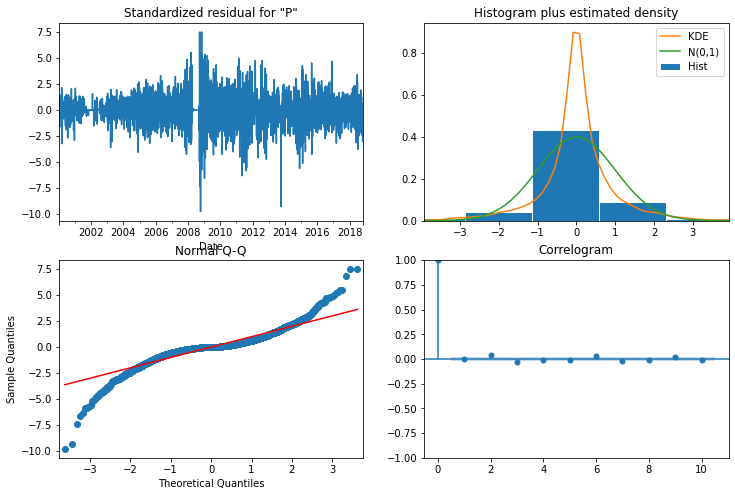

In [265]:
fitted_sarima.plot_diagnostics(figsize=(12,8))
plt.show()

### Calculate RMSE:

In [266]:
sarima_pred = fitted_sarima.predict(start=len(Train_3['Price']), end=(len(oilprices2)-1), dynamic=False, typ='levels')

In [267]:
sarima_pred.head()

2018-11-08    61.607813
2018-11-09    61.565349
2018-11-10    61.573760
2018-11-11    61.503033
2018-11-12    61.443612
Freq: D, Name: predicted_mean, dtype: float64

In [268]:
sarima_error = np.sqrt(mean_squared_error(Test_3['Price'], sarima_pred))
sarima_error

20.358238117077043

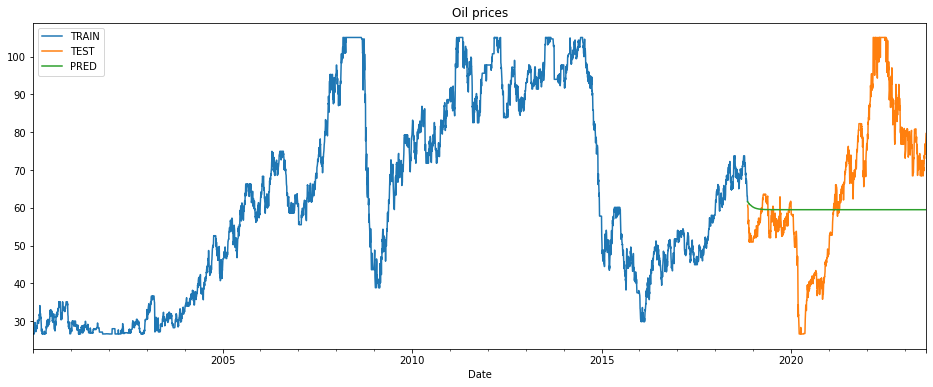

In [269]:
# Plot predictions against known values
title = 'Oil prices'
ylabel='Prices'
xlabel='' 

Train_3['Price'].plot(legend=True,label='TRAIN' ,figsize=(16,6),title=title)
Test_3['Price'].plot(legend=True,label='TEST',figsize=(16,6),title=title)
sarima_pred.plot(legend=True,label='PRED')
plt.show()

# Prophet Model 

It works best with time series that have strong seasonal effects and several seasons of historical data

In [270]:
import prophet

In [271]:
pro_df = oilprices2.copy()
pro_df= pro_df.reset_index()
pro_df.head()

Date  Price
0 2000-01-04  26.62
1 2000-01-05  26.62
2 2000-01-06  26.62
3 2000-01-07  26.62
4 2000-01-08  26.62

In [272]:
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

pro_df.isnull().sum()

Date     0
Price    0
dtype: int64

In [273]:
## Change column names for FB Prophet
pro_df.columns=['ds','y']
pro_df['ds']=pd.to_datetime(pro_df['ds'])
pro_df.tail()

ds          y
8599 2023-07-21  77.070000
8600 2023-07-22  77.626667
8601 2023-07-23  78.183333
8602 2023-07-24  78.740000
8603 2023-07-25  79.640000

<AxesSubplot:xlabel='ds'>

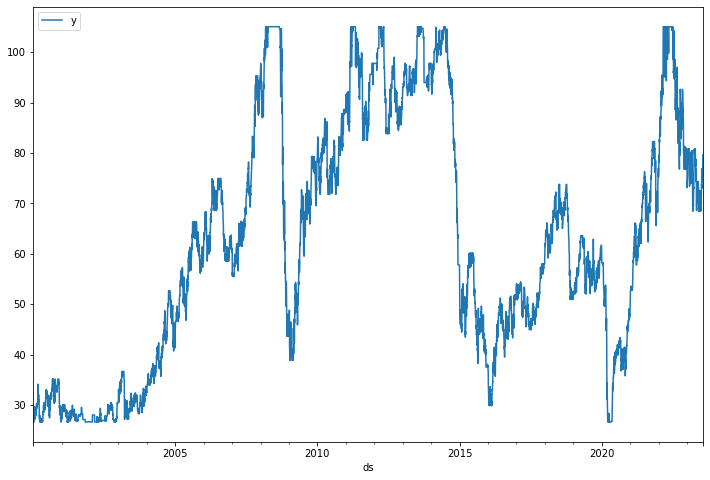

In [274]:
pro_df.plot(x='ds',y='y',figsize=(12,8))

In [275]:
#splitting the data:
Train_size3= int(len(pro_df)*0.80)
Train3 = pro_df[:Train_size3]
Test3 =pro_df[Train_size3:]

In [276]:
#model Building:

m=Prophet()
m.fit(Train3)
future = m.make_future_dataframe(periods=len(Test3),freq="D")
forecast = m.predict(future)

13:59:09 - cmdstanpy - INFO - Chain [1] start processing
13:59:14 - cmdstanpy - INFO - Chain [1] done processing


In [277]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0    2000-01-04  28.597577   21.400378   35.537427
1    2000-01-05  28.629969   21.643084   35.210032
2    2000-01-06  28.685812   21.339392   36.230475
3    2000-01-07  28.708090   20.658385   35.616503
4    2000-01-08  28.711690   21.142059   36.159343
...         ...        ...         ...         ...
8599 2023-07-21  84.518831 -187.824404  361.182535
8600 2023-07-22  84.552760 -187.011913  364.912033
8601 2023-07-23  84.585334 -186.319381  363.782547
8602 2023-07-24  84.615554 -187.063659  360.360124
8603 2023-07-25  84.606243 -190.017168  365.191189

[8604 rows x 4 columns]

In [278]:
plot_plotly(m,forecast)

In [279]:
plot_components_plotly(m,forecast)

### model evaluation

In [280]:
from statsmodels.tools.eval_measures import rmse

In [281]:
prop_predictions = forecast.iloc[6883:8604]['yhat']

In [282]:
prop_rmse = rmse(prop_predictions,Test3['y'])
prop_rmse

17.414739239899642

# LSTM Model:

It is special kind of recurrent neural network that is capable of learning long term dependencies in data

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [340]:
lstm_df = oilprices2.copy()
lstm_df.tail()

Price
Date                 
2023-07-21  77.070000
2023-07-22  77.626667
2023-07-23  78.183333
2023-07-24  78.740000
2023-07-25  79.640000

In [341]:
lstm_df1=lstm_df.reset_index()

In [343]:
lstm_df2 = lstm_df1.copy()
lstm_df1.head()

Date  Price
0 2000-01-04  26.62
1 2000-01-05  26.62
2 2000-01-06  26.62
3 2000-01-07  26.62
4 2000-01-08  26.62

In [345]:
prices = lstm_df1['Price'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

# Split data into training and testing sets
train_size = int(0.8 * len(prices_scaled))
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

In [346]:
train_data.shape, test_data.shape

((6883, 1), (1721, 1))

In [347]:
# Create sequences for training
sequence_length = 30

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [330]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
215/215 [==============================] - 5s 13ms/step - loss: 0.0145
Epoch 2/50
215/215 [==============================] - 2s 11ms/step - loss: 5.2388e-04
Epoch 3/50
215/215 [==============================] - 3s 12ms/step - loss: 4.4453e-04
Epoch 4/50
215/215 [==============================] - 3s 12ms/step - loss: 4.0646e-04
Epoch 5/50
215/215 [==============================] - 3s 12ms/step - loss: 3.8031e-04
Epoch 6/50
215/215 [==============================] - 3s 12ms/step - loss: 3.5258e-04
Epoch 7/50
215/215 [==============================] - 3s 13ms/step - loss: 3.2524e-04
Epoch 8/50
215/215 [==============================] - 3s 12ms/step - loss: 3.0438e-04
Epoch 9/50
215/215 [==============================] - 3s 13ms/step - loss: 2.8281e-04
Epoch 10/50
215/215 [==============================] - 3s 16ms/step - loss: 2.8175e-04
Epoch 11/50
215/215 [==============================] - 3s 16ms/step - loss: 2.7350e-04
Epoch 12/50
215/215 [==============================] - 4

In [348]:
# Test the model
y_pred = model.predict(X_test)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {lstm_rmse}')

53/53 [==============================] - 0s 4ms/step
Root Mean Squared Error: 0.015948477920372597


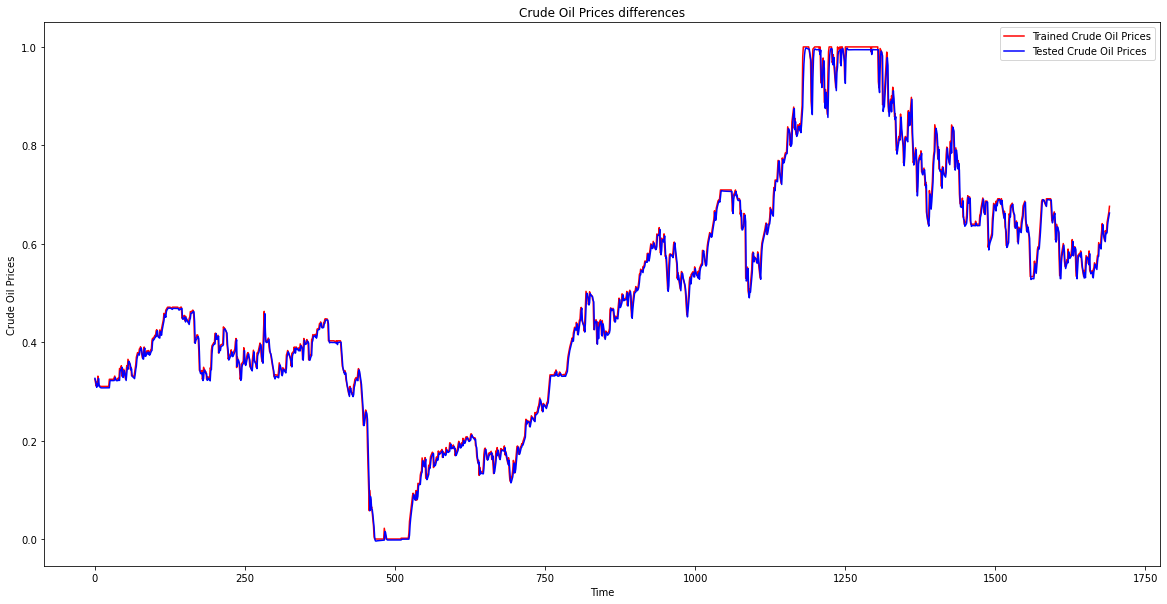

In [381]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(y_test, color = 'red', label = 'Trained Crude Oil Prices')
plt.plot(y_pred, color = 'blue', label = 'Tested Crude Oil Prices')
plt.title('Crude Oil Prices differences')
plt.xlabel('Time')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

# Comparison of rmse results:

In [332]:
# Comapre the Results 
data = {'Model':pd.Series(['rmse_linear','rmse_Exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add_sea', 'Simple Exponential Smoothing','Holt Method',
'Holts winter exponential smoothing with additive seasonality and additive trend',
'Holts winter exponential smoothing with multiplicative seasonality and additive trend',
'ARIMA', 'SARIMA', 'Prophet', 'LSTM']),'Rmse_Values':pd.Series([rmse_linear,rmse_Exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea,rmse_ses,rmse_hw, rmse_hwe_add_add,rmse_hwe_mul_add,arima_error, sarima_error, prop_rmse, lstm_rmse])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['Rmse_Values'])

Model  Rmse_Values
14                                               LSTM     0.015948
13                                            Prophet    17.414739
9   Holts winter exponential smoothing with additi...    17.854518
10  Holts winter exponential smoothing with multip...    17.860192
7                        Simple Exponential Smoothing    19.812002
11                                              ARIMA    19.815884
3                                        rmse_add_sea    19.816604
12                                             SARIMA    20.358238
5                                        rmse_mul_sea    21.572407
0                                         rmse_linear    28.901978
6                                    rmse_mul_add_sea    34.432730
1                                            rmse_Exp    34.572133
2                                           rmse_quad    53.215874
4                                   rmse_add_sea_quad    53.486963
8                                         Holt Method   472.249051

We can see that the LSTM gives the lowest rmse value, so we can make the final predication based on LSTM model

# Final predictions for next one month of Oil Prices:

In [360]:
# # Make predictions for the next 30 days
# last_sequence = train_data[-sequence_length:]
# predictions = []
# for _ in range(30):
#     next_pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
#     predictions.append(next_pred)
#     last_sequence = np.concatenate((last_sequence[1:], next_pred), axis=None)

# # Inverse transform predictions
# predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 [==============================] - 0s 20ms/step


In [363]:
# predictions_df = pd.DataFrame(predictions, columns =['Oil Prices for next one Month'])
# predictions_df

Oil Prices for next one Month
0                       61.356144
1                       61.045227
2                       60.749653
3                       60.456142
4                       60.163933
5                       59.873623
6                       59.585636
7                       59.300236
8                       59.017365
9                       58.736923
10                      58.459042
11                      58.183304
12                      57.909325
13                      57.636856
14                      57.365753
15                      57.095776
16                      56.826870
17                      56.558998
18                      56.292042
19                      56.025993
20                      55.760746
21                      55.496128
22                      55.231953
23                      54.968075
24                      54.704517
25                      54.441246
26                      54.178246
27                      53.915302
28                      53.652878
29                      53.391605